<a href="https://colab.research.google.com/github/lishuoren/lijiahui/blob/main/Untitled1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import glob
import os

导入数据集

In [ ]:
(train_images, train_labels), (_, _) = tf.keras.datasets.mnist.load_data()

预处理

In [ ]:
train_images = train_images.reshape(train_images.shape[0], 28, 28, 1).astype('float32')
train_images = (train_images - 127.5) / 127.5      

In [ ]:
BUFFER_SIZE = train_images.shape[0]
BATCH_SIZE = 256

创建输入管道

In [ ]:
train_dataset = tf.data.Dataset.from_tensor_slices(train_images).shuffle(BUFFER_SIZE).batch(BATCH_SIZE)

搭建生成器网络结构

In [ ]:
def generator_model():
    model = tf.keras.Sequential()
    model.add(layers.Dense(256, use_bias=False, input_shape=(100,)))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())
    
    model.add(layers.Dense(512, use_bias=False))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())
    
    model.add(layers.Dense(28*28*1, use_bias=False, activation='tanh'))
    model.add(layers.BatchNormalization())
    
    model.add(layers.Reshape((28, 28, 1)))

    return model

搭建判别器网络结构

In [ ]:
def discriminator_model():
    model = tf.keras.Sequential()
    
    model.add(layers.Flatten())
    
    model.add(layers.Dense(512, use_bias=False))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())
    
    model.add(layers.Dense(256, use_bias=False))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())
    
    model.add(layers.Dense(1))

    return model

定义损失函数

In [ ]:
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)

In [ ]:
def discriminator_loss(real_output, fake_output):
    real_loss = cross_entropy(tf.ones_like(real_output), real_output)
    fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)
    total_loss = real_loss + fake_loss
    return total_loss

In [ ]:
def generator_loss(fake_output):
    return cross_entropy(tf.ones_like(fake_output), fake_output)

In [ ]:
generator_optimizer = tf.keras.optimizers.Adam(1e-4)
discriminator_optimizer = tf.keras.optimizers.Adam(1e-4)

In [ ]:
EPOCHS = 100
noise_dim = 100
num_examples_to_generate = 16

seed = tf.random.normal([num_examples_to_generate, noise_dim])

In [ ]:
generator = generator_model()
discriminator = discriminator_model()

In [ ]:
@tf.function
def train_step(images):
    noise = tf.random.normal([BATCH_SIZE, noise_dim])

    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
        generated_images = generator(noise, training=True)

        real_output = discriminator(images, training=True)
        fake_output = discriminator(generated_images, training=True)

        gen_loss = generator_loss(fake_output)
        disc_loss = discriminator_loss(real_output, fake_output)

    gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))

In [ ]:
def generate_and_save_images(model, epoch, test_input):
  # Notice `training` is set to False.
  # This is so all layers run in inference mode (batchnorm).
    predictions = model(test_input, training=False)

    fig = plt.figure(figsize=(4, 4))

    for i in range(predictions.shape[0]):
        plt.subplot(4, 4, i+1)
        plt.imshow((predictions[i, :, :, 0] + 1)/2, cmap='gray')
        plt.axis('off')

    plt.savefig('image_at_epoch_{:04d}.png'.format(epoch))
    plt.show()

In [ ]:
def train(dataset, epochs):
    for epoch in range(epochs):
        for image_batch in dataset:
            train_step(image_batch)
            print('.', end='')
        print()

        generate_and_save_images(generator,epoch + 1,seed)

    generate_and_save_images(generator,epochs,seed)

...........................................................................................................................................................................................................................................


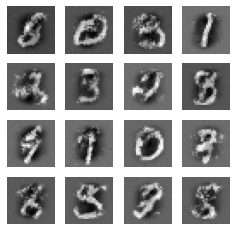

...........................................................................................................................................................................................................................................


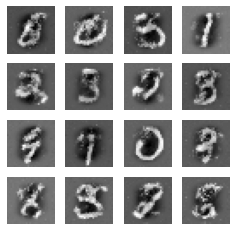

...........................................................................................................................................................................................................................................


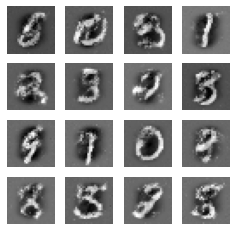

...........................................................................................................................................................................................................................................


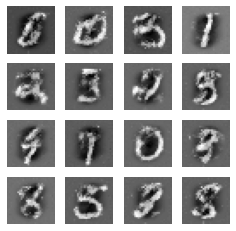

...........................................................................................................................................................................................................................................


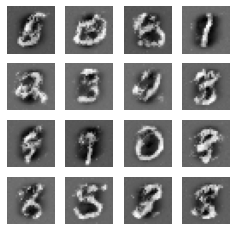

...........................................................................................................................................................................................................................................


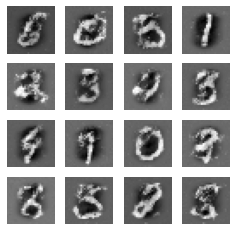

...........................................................................................................................................................................................................................................


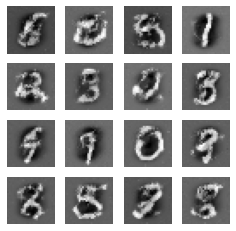

...........................................................................................................................................................................................................................................


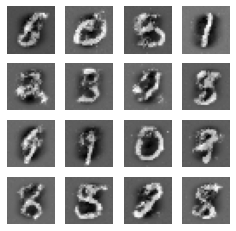

...........................................................................................................................................................................................................................................


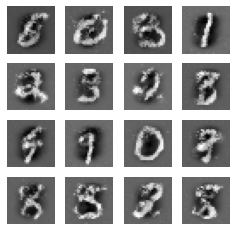

...........................................................................................................................................................................................................................................


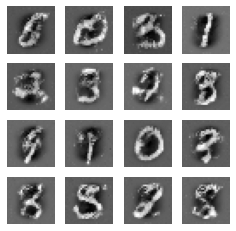

...........................................................................................................................................................................................................................................


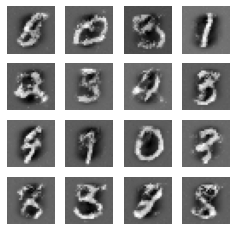

...........................................................................................................................................................................................................................................


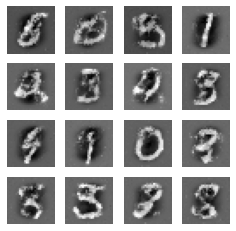

...........................................................................................................................................................................................................................................


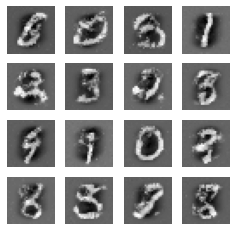

...........................................................................................................................................................................................................................................


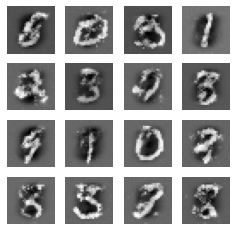

...........................................................................................................................................................................................................................................


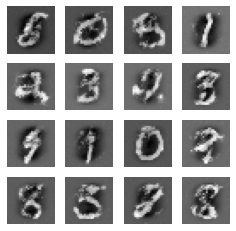

...........................................................................................................................................................................................................................................


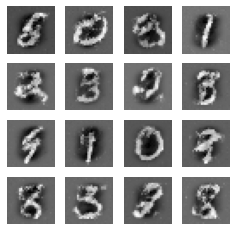

...........................................................................................................................................................................................................................................


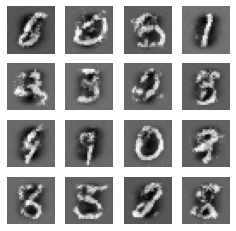

...........................................................................................................................................................................................................................................


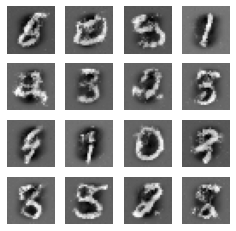

...........................................................................................................................................................................................................................................


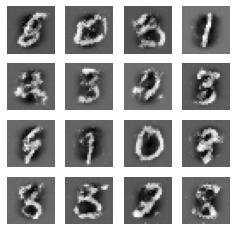

...........................................................................................................................................................................................................................................


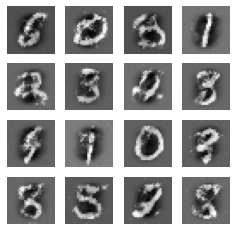

...........................................................................................................................................................................................................................................


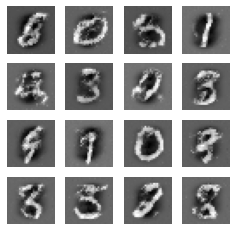

...........................................................................................................................................................................................................................................


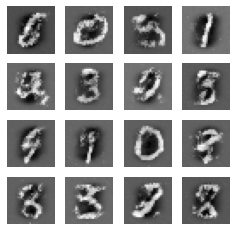

...........................................................................................................................................................................................................................................


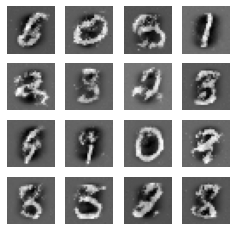

...........................................................................................................................................................................................................................................


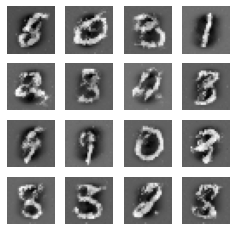

...........................................................................................................................................................................................................................................


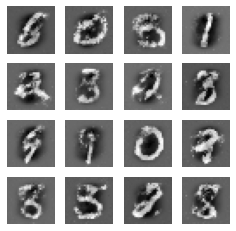

...........................................................................................................................................................................................................................................


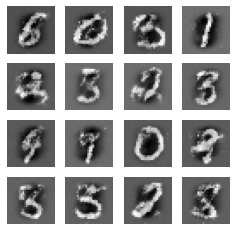

...........................................................................................................................................................................................................................................


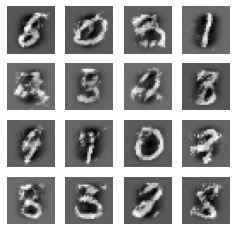

...........................................................................................................................................................................................................................................


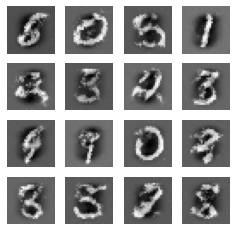

...........................................................................................................................................................................................................................................


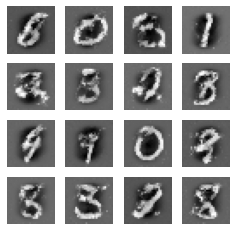

...........................................................................................................................................................................................................................................


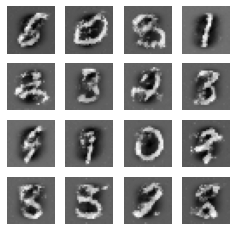

...........................................................................................................................................................................................................................................


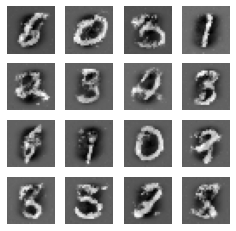

...........................................................................................................................................................................................................................................


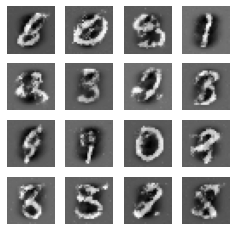

...........................................................................................................................................................................................................................................


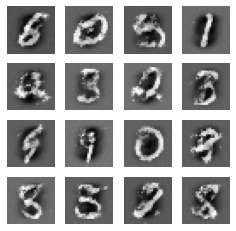

...........................................................................................................................................................................................................................................


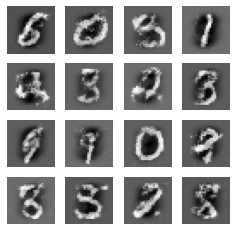

...........................................................................................................................................................................................................................................


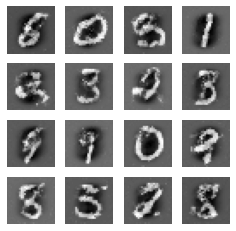

...........................................................................................................................................................................................................................................


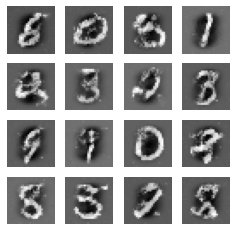

...........................................................................................................................................................................................................................................


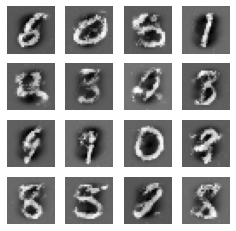

...........................................................................................................................................................................................................................................


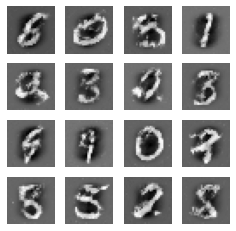

...........................................................................................................................................................................................................................................


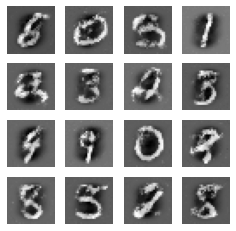

...........................................................................................................................................................................................................................................


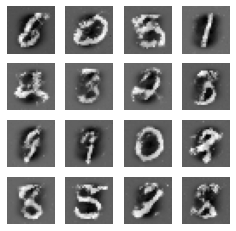

...........................................................................................................................................................................................................................................


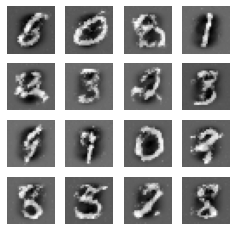

...........................................................................................................................................................................................................................................


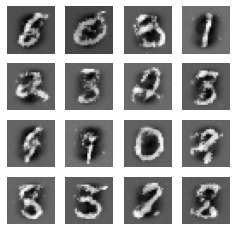

...........................................................................................................................................................................................................................................


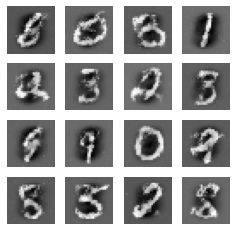

...........................................................................................................................................................................................................................................


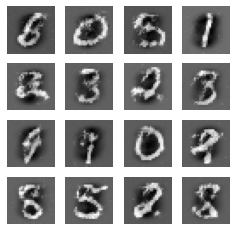

...........................................................................................................................................................................................................................................


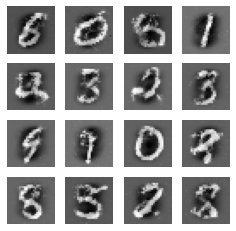

...........................................................................................................................................................................................................................................


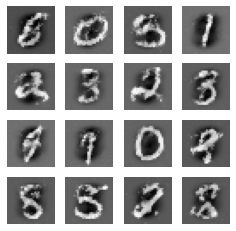

...........................................................................................................................................................................................................................................


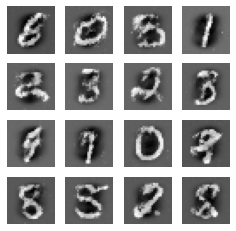

...........................................................................................................................................................................................................................................


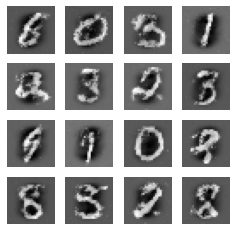

...........................................................................................................................................................................................................................................


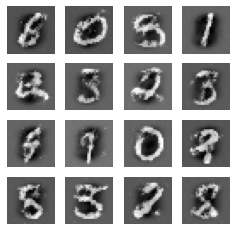

...........................................................................................................................................................................................................................................


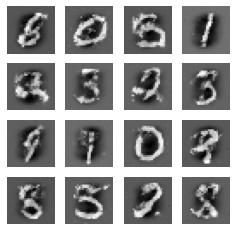

...........................................................................................................................................................................................................................................


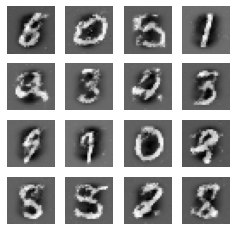

...........................................................................................................................................................................................................................................


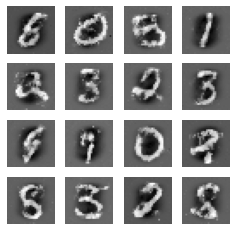

...........................................................................................................................................................................................................................................


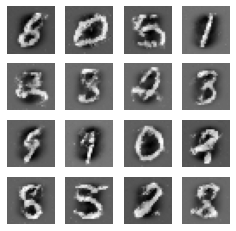

...........................................................................................................................................................................................................................................


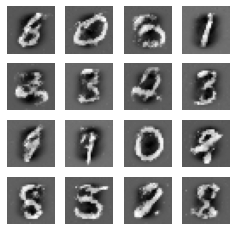

...........................................................................................................................................................................................................................................


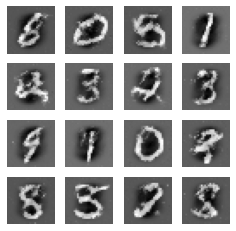

...........................................................................................................................................................................................................................................


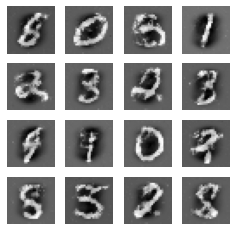

...........................................................................................................................................................................................................................................


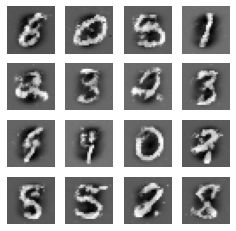

...........................................................................................................................................................................................................................................


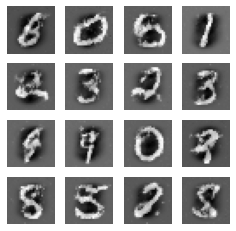

...........................................................................................................................................................................................................................................


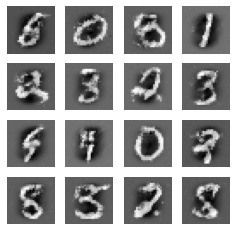

...........................................................................................................................................................................................................................................


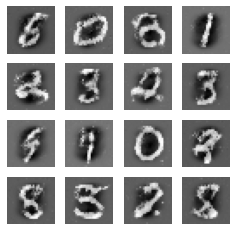

...........................................................................................................................................................................................................................................


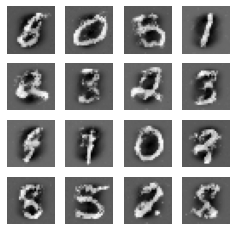

...........................................................................................................................................................................................................................................


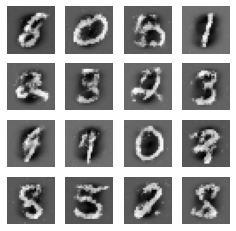

...........................................................................................................................................................................................................................................


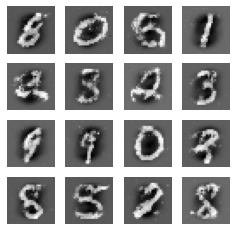

...........................................................................................................................................................................................................................................


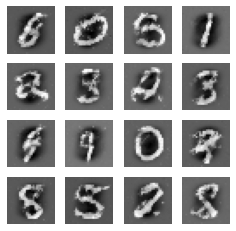

...........................................................................................................................................................................................................................................


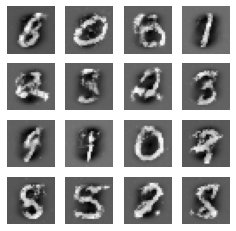

...........................................................................................................................................................................................................................................


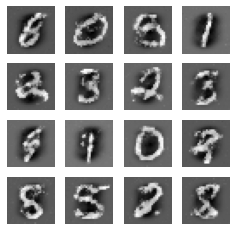

...........................................................................................................................................................................................................................................


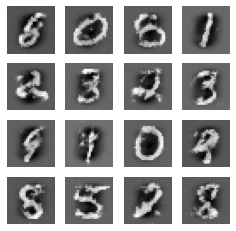

...........................................................................................................................................................................................................................................


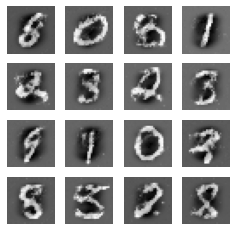

...........................................................................................................................................................................................................................................


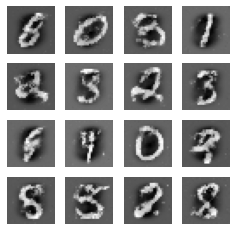

...........................................................................................................................................................................................................................................


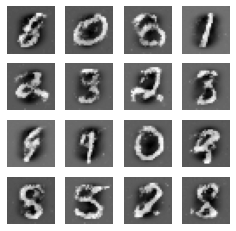

...........................................................................................................................................................................................................................................


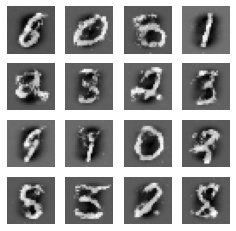

...........................................................................................................................................................................................................................................


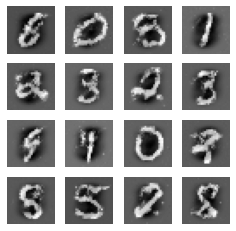

...........................................................................................................................................................................................................................................


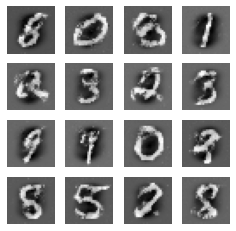

...........................................................................................................................................................................................................................................


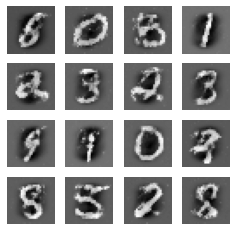

...........................................................................................................................................................................................................................................


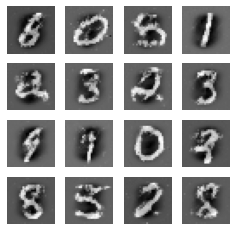

...........................................................................................................................................................................................................................................


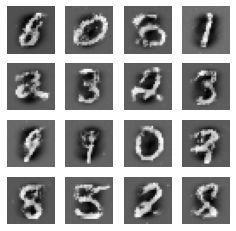

...........................................................................................................................................................................................................................................


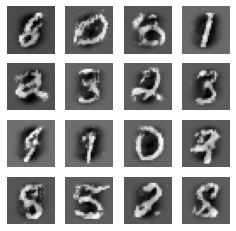

...........................................................................................................................................................................................................................................


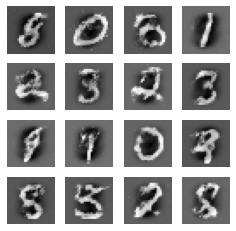

...........................................................................................................................................................................................................................................


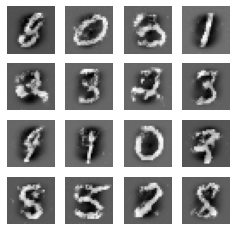

...........................................................................................................................................................................................................................................


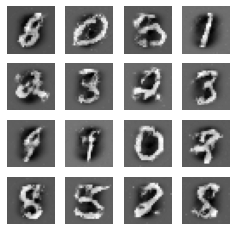

...........................................................................................................................................................................................................................................


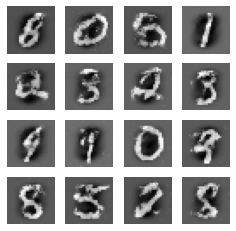

...........................................................................................................................................................................................................................................


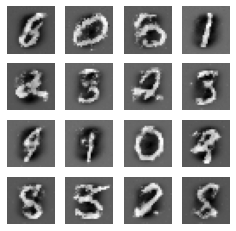

...........................................................................................................................................................................................................................................


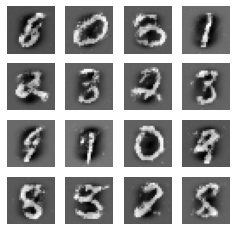

...........................................................................................................................................................................................................................................


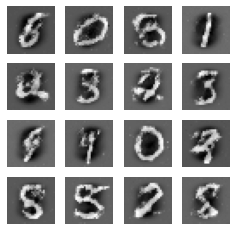

...........................................................................................................................................................................................................................................


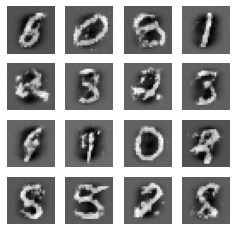

...........................................................................................................................................................................................................................................


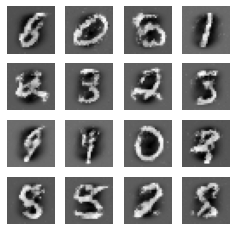

...........................................................................................................................................................................................................................................


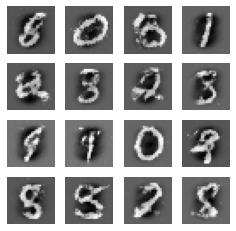

...........................................................................................................................................................................................................................................


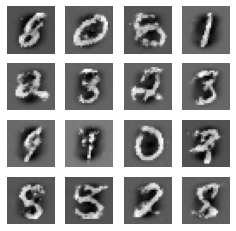

...........................................................................................................................................................................................................................................


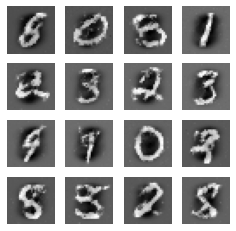

...........................................................................................................................................................................................................................................


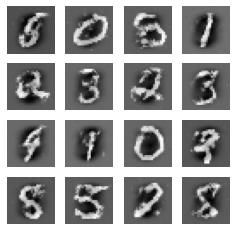

...........................................................................................................................................................................................................................................


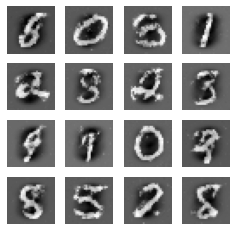

...........................................................................................................................................................................................................................................


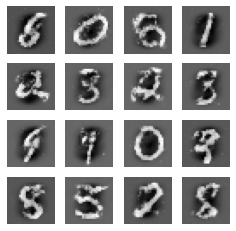

...........................................................................................................................................................................................................................................


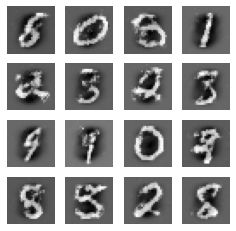

...........................................................................................................................................................................................................................................


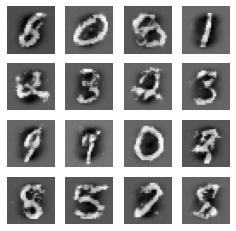

...........................................................................................................................................................................................................................................


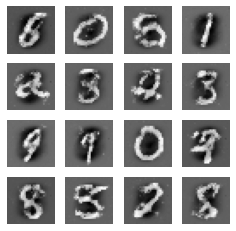

...........................................................................................................................................................................................................................................


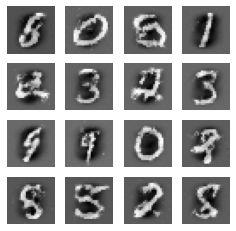

...........................................................................................................................................................................................................................................


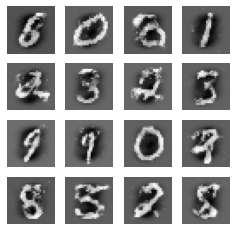

...........................................................................................................................................................................................................................................


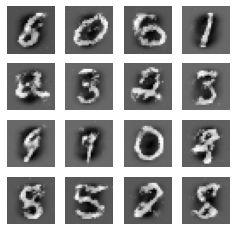

...........................................................................................................................................................................................................................................


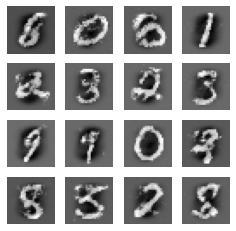

...........................................................................................................................................................................................................................................


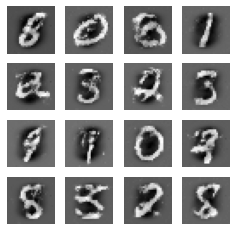

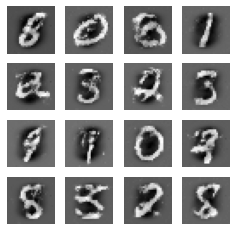

In [ ]:
train(train_dataset, EPOCHS)